In [ ]:
! pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=3135aa89d67ebd709facf803619068e2f753a267540318b6ddd40aae6c56699d
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
Difficulté_matiere = ctrl.Antecedent(universe=np.arange(0,105,5), label='Difficulté_matiere')

Difficulté_matiere['facile'] = fuzz.trapmf(Difficulté_matiere.universe, [0,0,20,30])
Difficulté_matiere['moyenne'] = fuzz.trapmf(Difficulté_matiere.universe, [25,35,50,60])
Difficulté_matiere['difficile'] = fuzz.trapmf(Difficulté_matiere.universe, [55,75,100,100])

In [ ]:
Enseignement = ctrl.Antecedent(universe=np.arange(0,10.5,0.5), label='Enseignement')

Enseignement['mauvais'] = fuzz.trapmf(Enseignement.universe, [0,0,2,3.5])
Enseignement['moyen'] = fuzz.trapmf(Enseignement.universe, [3,4,6,7])
Enseignement['décent'] = fuzz.trapmf(Enseignement.universe, [6.5,7,10,10])

In [ ]:
Revision_etud = ctrl.Antecedent(universe=np.arange(0,10.5,0.5), label='Revision_etud')

Revision_etud['mauvaise'] = fuzz.trapmf(Revision_etud.universe, [0,0,2,3.5])
Revision_etud['moyenne'] = fuzz.trapmf(Revision_etud.universe, [3,4,6,7])
Revision_etud['bonne'] = fuzz.trapmf(Revision_etud.universe, [6.5,7,10,10])

In [ ]:
Note_etudiant = ctrl.Consequent(universe=np.arange(0,20.5,0.5), label='Note_etudiant')

Note_etudiant['sous moyenne'] = fuzz.trapmf(Note_etudiant.universe, [0,0,5,10])
Note_etudiant['moyenne'] = fuzz.trapmf(Note_etudiant.universe, [8,10,12,14])
Note_etudiant['bonne'] = fuzz.trapmf(Note_etudiant.universe, [13.5,15,20,20])

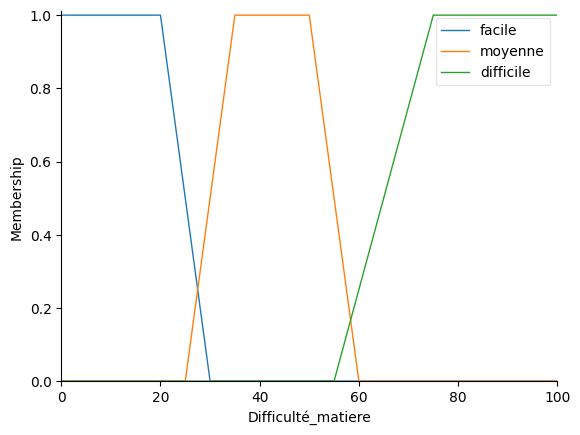

In [ ]:
Difficulté_matiere.view()

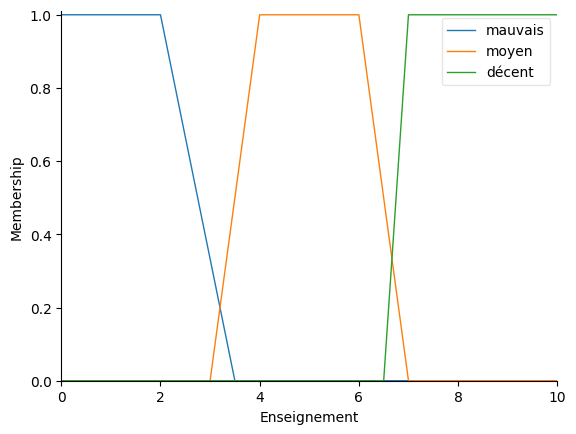

In [ ]:
Enseignement.view()

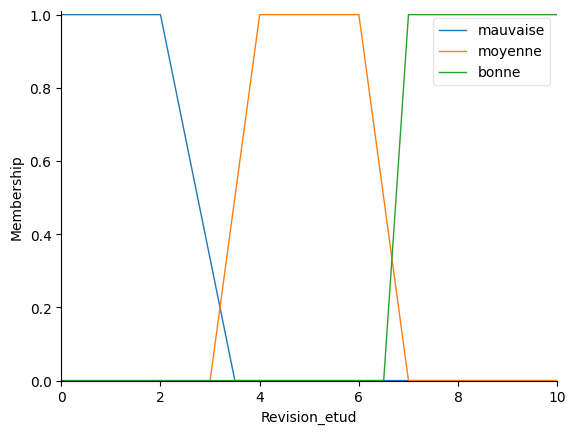

In [ ]:
Revision_etud.view()

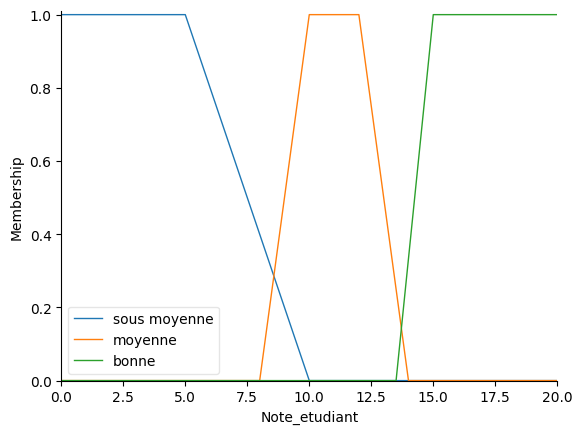

In [ ]:
Note_etudiant.view()

In [ ]:
rule1 = ctrl.Rule(Difficulté_matiere['difficile'] & Revision_etud['mauvaise'], Note_etudiant['sous moyenne'])
rule2 = ctrl.Rule(Difficulté_matiere['moyenne'] | (Revision_etud['moyenne'] | Enseignement['moyen'])  , Note_etudiant['moyenne'])
rule3 = ctrl.Rule(Difficulté_matiere['difficile'] & (Revision_etud['bonne'] | Enseignement['décent']), Note_etudiant['moyenne'])
rule4 = ctrl.Rule(Difficulté_matiere['facile'] & (Enseignement['décent'] | Revision_etud['bonne']) , Note_etudiant['bonne'])
rule5 = ctrl.Rule(Difficulté_matiere['difficile'] & Revision_etud['bonne'] & Enseignement['décent'] , Note_etudiant['bonne'])
rule6 = ctrl.Rule(Difficulté_matiere['moyenne'] & (Revision_etud['bonne'] | Enseignement['décent']), Note_etudiant['bonne'])

In [ ]:
Resultat_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
Resultat = ctrl.ControlSystemSimulation(control_system=Resultat_ctrl, clip_to_bounds=True)

la note probable est: 10.999999999999998


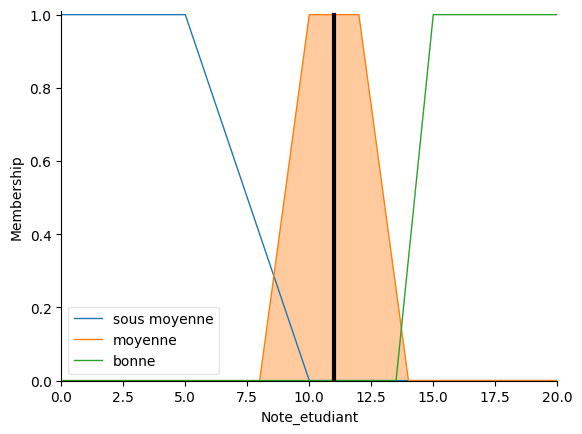

In [ ]:
Resultat.input['Difficulté_matiere'] = 20
Resultat.input['Enseignement'] = 5
Resultat.input['Revision_etud'] = 2

Resultat.compute()

print("la note probable est:", Resultat.output['Note_etudiant'])
Note_etudiant.view(sim=Resultat)